# Import libraries

In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

path = root_path+'/res_1gauss_bg'

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


# Visualize some old results without running the code

0 max
nf_output_data_max.dat


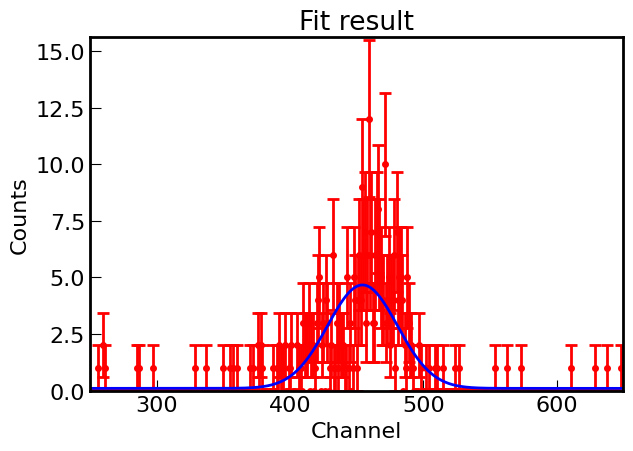

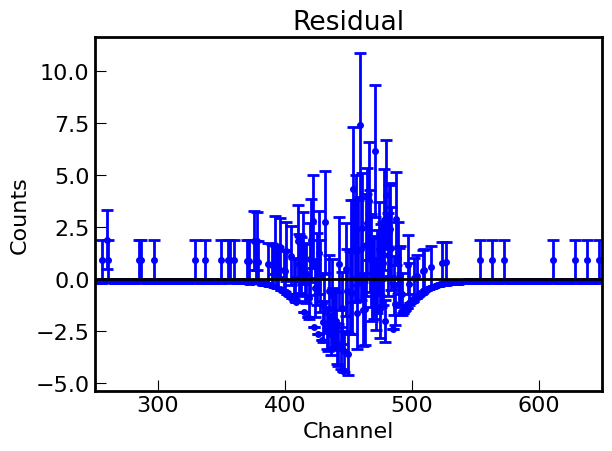

In [3]:
# Visualize results in another directory

# Load the library without loading the adata
an_test = pynf.Analysis(loaddata=False)

# Define a directory and look inside
an_test.plot(path=path)

# Run the code in a specific directory

In [4]:
# Go to a define analysis
os.chdir(path)
print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_1gauss_bg


### Example of legacy function use from USERFCN.f

In [5]:
# Define inputs using a "legacy" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=['GAUSS_BG'],
    params={                    # Function expression from legacy
        'b_g': {'value': 0.01,  'step': -1, 'min': 0, 'max': 0.3 ,   'npar': 1},
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 2},
        'A_1': {'value': 300,   'step': -1, 'min': 0, 'max': 500 ,   'npar': 3},
        's':   {'value': 20,    'step': -1, 'min': 10, 'max': 30 ,   'npar': 4}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=1,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of latex function

In [6]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of use of internal or already defined latex function

In [72]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [73]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')
# If nothing shows, use simply the command (symlink to created or version to be used)
# run_nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g
Infix expression: GAUSS_IF(x,x1,A1,s)+bg
      Parameters: A_1, b_g, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:   -1474.872769252039461 | Evidence:   -1483.094191874233502 | Ev. step:   -1483.100016721198244 | Ev. pres. acc.:  1.1494262E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1311.629541709725572 | Evidence:   -1318.988301153165366 | Ev. step:   -1319.338795379203930 | Ev. pres. acc.:  9.8522031E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1212.033060531494357 | Evidence:   -1218.613790104851660 | Ev. step:   -1219.372392588072898 | Ev. pres. acc.:  8.8474579E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1143.160373714987145 | Evidence:   -1149.716309083678880 | Ev. step:   -1150.539459258619900 | Ev. pres. acc.:  8.

# Visualize the results

In [74]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g']


0 max
nf_output_data_max.dat


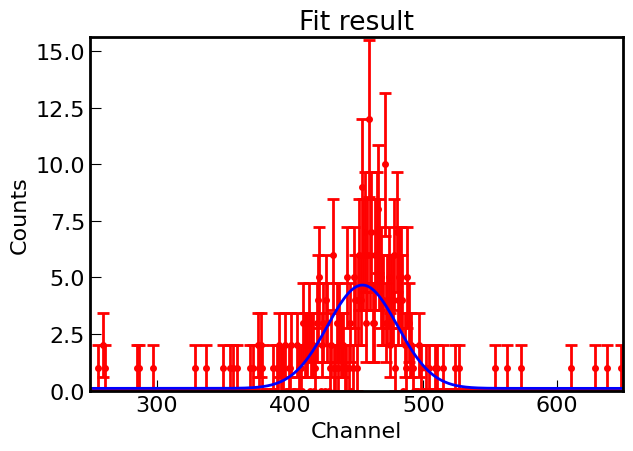

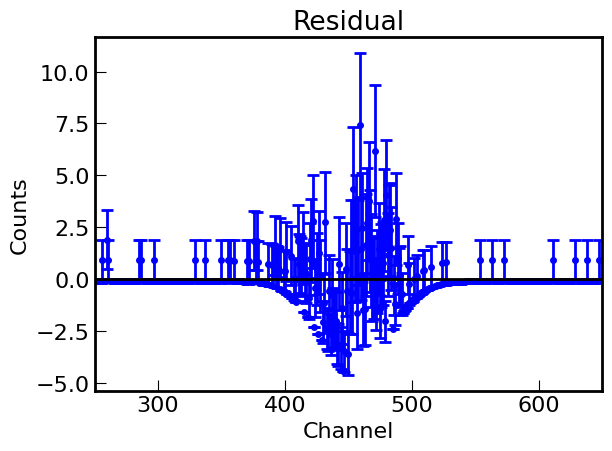

In [75]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

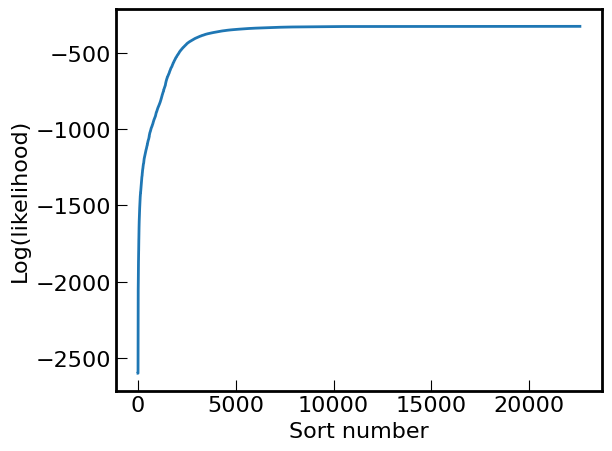

In [76]:
# Plot the likelihood sampling 
an.plot_like()

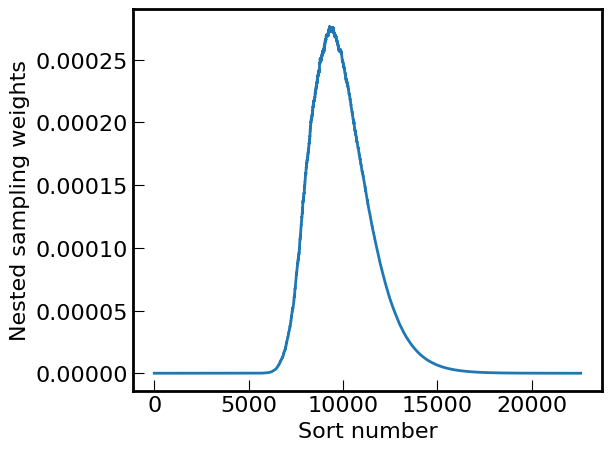

In [77]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

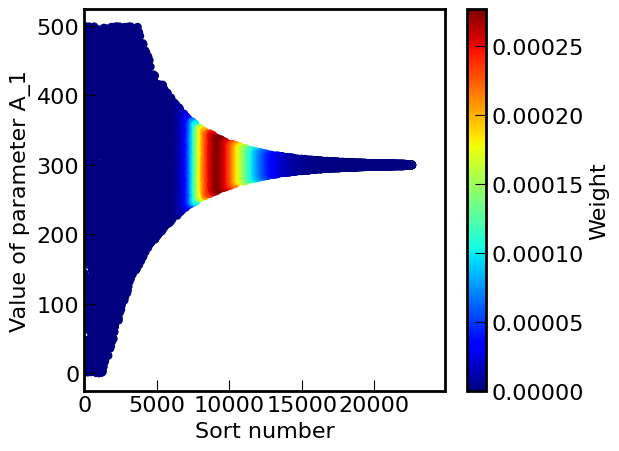

In [78]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

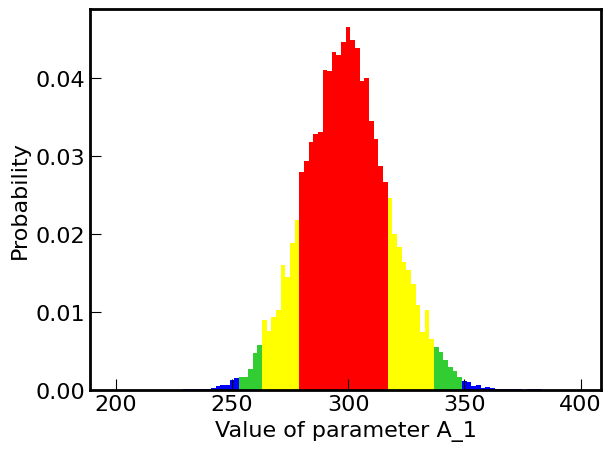

In [79]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

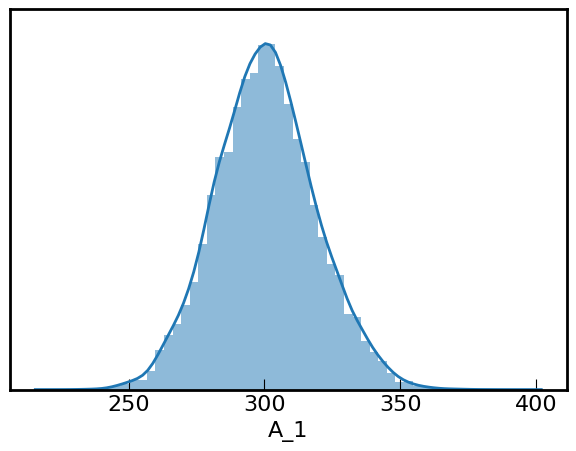

In [80]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('A_1',path=path)

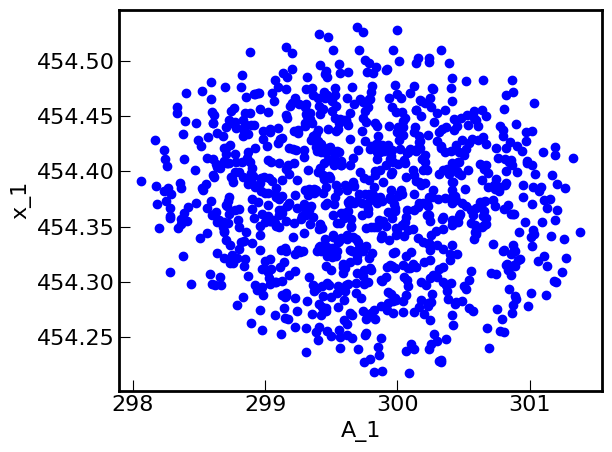

In [81]:
an.plot_live('A_1','x_1')

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1104: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1105: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1106: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1107: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

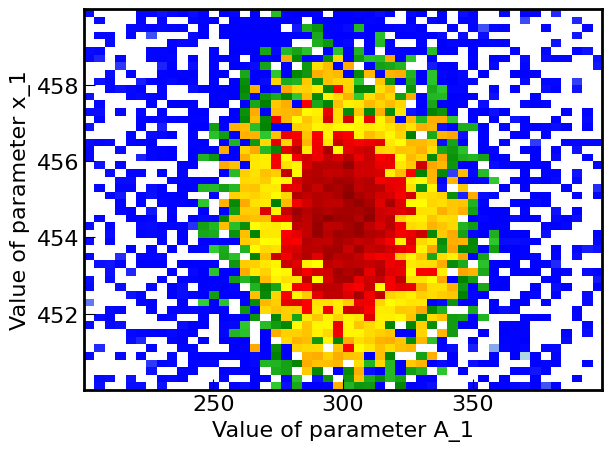

In [82]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

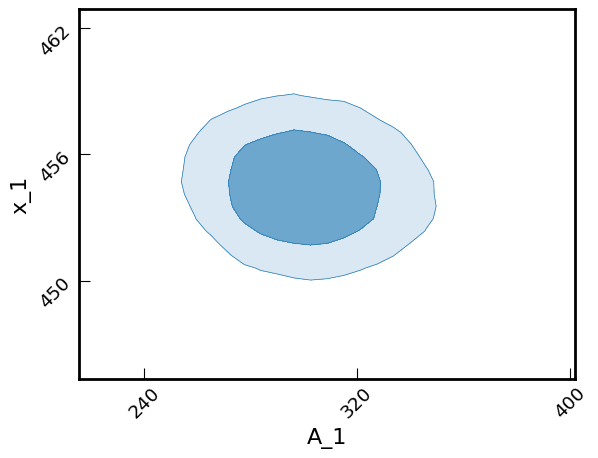

In [83]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('A_1','x_1',path=path)


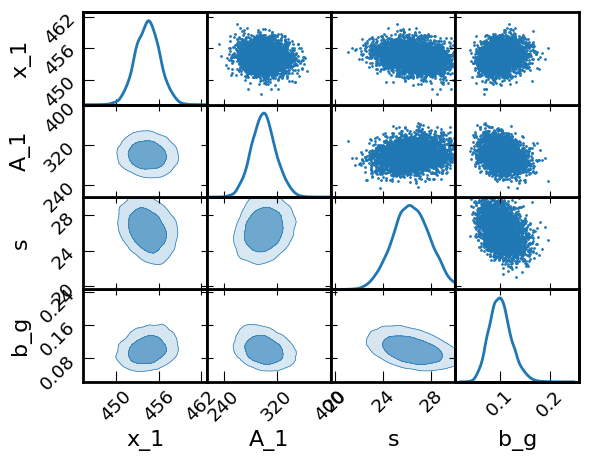

In [84]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

# Extract important data and post-processing

In [85]:
# Extract the raw information of evidence
out[ 'evidence']

{'stddev': 0.0,
 'uncertainty': 0.0900423365416741,
 'value': -338.31017697181676}

In [87]:
# Specific information of output parameters
par_name = 'x_1'
print(par_name, ' = ', out['params'][par_name][ 'mean'],' ± ', out['params'][par_name][ 'std'])

x_1  =  454.43374214909664  ±  1.7088772243860677


In [58]:
# Miscelaneous information
out['meta']

{'bayes_complexity': 10.048726361411923,
 'information': 18.81629418683781,
 'minimal_req_it': 148529505,
 'ncores': 10,
 'timereal': 9.638400999829173,
 'timetotal': 58.515849}

In [21]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -338.383164 	± 0.083503
D_KL 	 = 8.208820 	± 0.081902
logL_P 	 = -330.174345 	± 0.028772
d_G 	 = 3.777515 	± 0.092822


# Combine latex functions with library functions

## Two Gaussian plus background

In [22]:
# Define a directory 
path = root_path+'/res_2gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_2gauss_bg


In [23]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'double_gauss_bg(x, x_1, x_2, A_1, A_2, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [24]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+bg
      Parameters: A_1, A_2, b_g, s, x_1, x_2
| N. try:  1 | N. step:        100 | Min. loglike:   -1566.116576158993212 | Evidence:   -1575.253543577643541 | Ev. step:   -1575.632517636907778 | Ev. pres. acc.:  1.2477983E+03 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1370.684505131824153 | Evidence:   -1377.421276084871806 | Ev. step:   -1378.498873342764682 | Ev. pres. acc.:  1.0498660E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1244.696431172825669 | Evidence:   -1254.211518776836328 | Ev. step:   -1254.445266314153514 | Ev. pres. acc.:  9.2655628E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1163.018075076963214 | Evidence:   -1169.5665

### Visualize the results 

In [25]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']


0 max
nf_output_data_max.dat


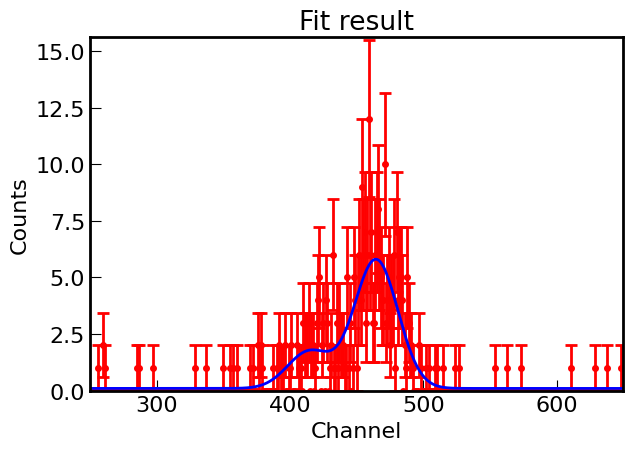

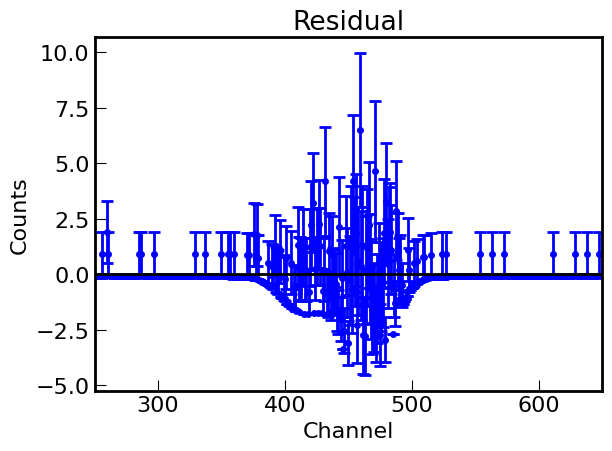

In [26]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

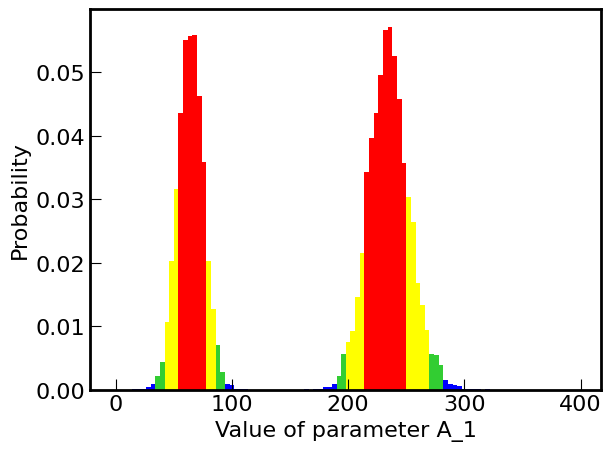

In [27]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1104: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1105: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1106: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1107: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

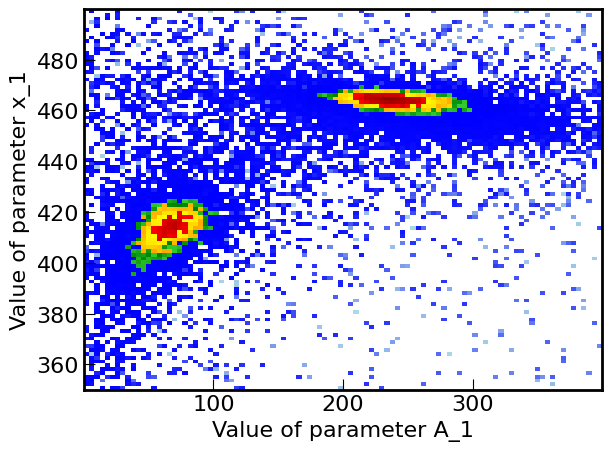

In [28]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

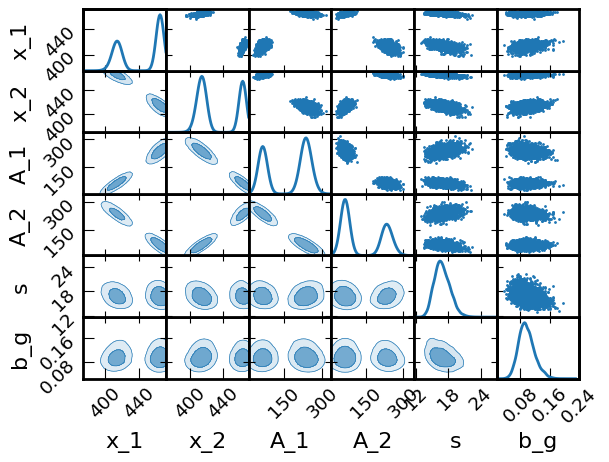

In [29]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [31]:
# Define a directory 
path = root_path+'/res_3gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_3gauss_bg


In [32]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'triple_gauss_bg(x, x_1, x_2, x_3, A_1, A_2, A_3, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [33]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + \texttt{GAUSS_IF}(x, x_3, A_3, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+GAUSS_IF(x,x3,A3,s)+bg
      Parameters: A_1, A_2, A_3, b_g, s, x_1, x_2, x_3
| N. try:  1 | N. step:        100 | Min. loglike:   -1663.724350510037766 | Evidence:   -1672.540453628129171 | Ev. step:   -1672.962598780716007 | Ev. pres. acc.:  1.2982944E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1491.706577215853940 | Evidence:   -1500.261590983830502 | Ev. step:   -1500.616157488768977 | Ev. pres. acc.:  1.1259156E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1358.551858768737247 | Evidence:   -1365.535934012096277 | Ev. step:   -1366.431955105448878 | Ev. pres. acc.:  9.9108993E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        40

### Visualize the results 

In [34]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's',
       'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']


0 max
nf_output_data_max.dat


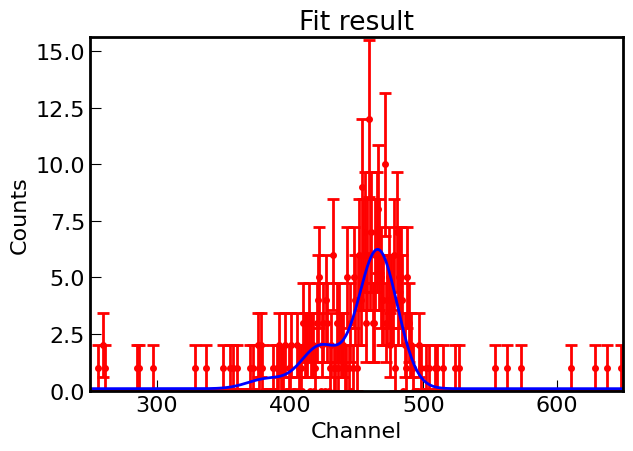

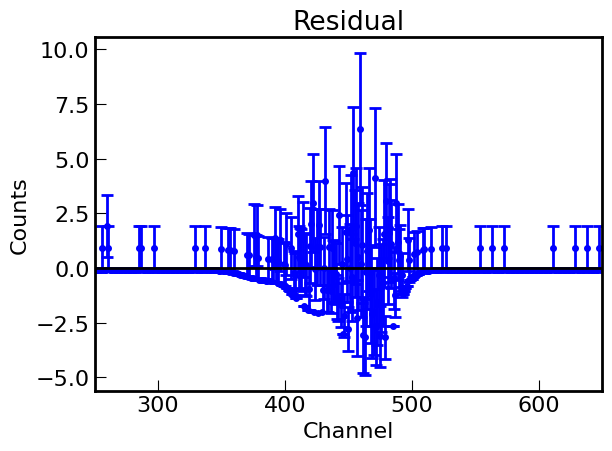

In [35]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

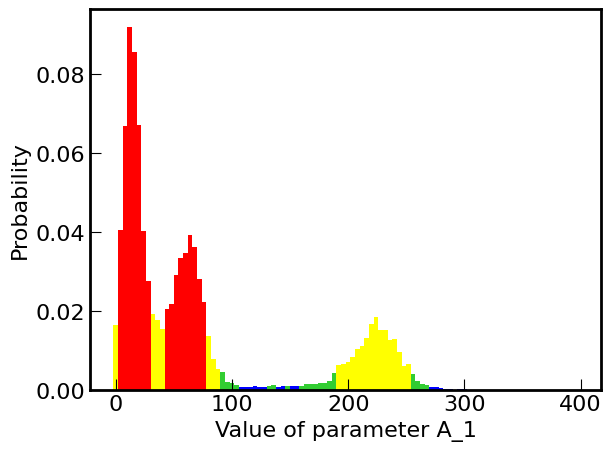

In [36]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1104: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1105: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1106: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1107: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

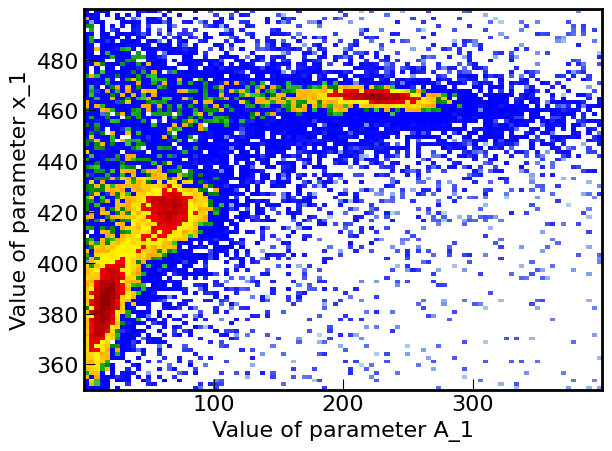

In [37]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

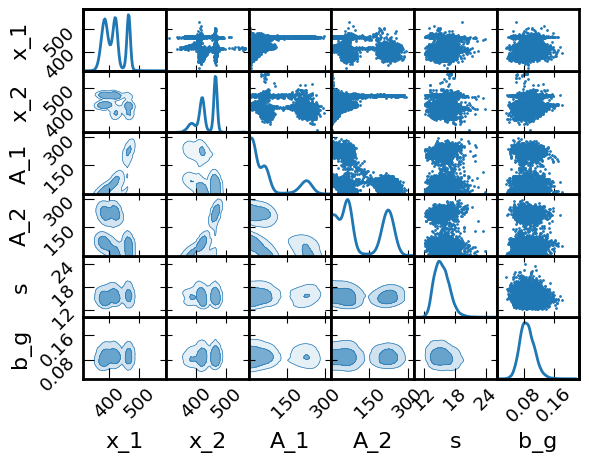

In [38]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

## Four Gaussian plus background

In [40]:
# Define a directory 
path = root_path+'/res_4gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_4gauss_bg


In [41]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'four_gauss_bg(x, x_1, x_2, x_3, x_4, A_1, A_2, A_3, A_4, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_4, A_4, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_4': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_4': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [42]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + \texttt{GAUSS_IF}(x, x_3, A_3, s) + \texttt{GAUSS_IF}(x, x_4, A_4, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+GAUSS_IF(x,x3,A3,s)+GAUSS_IF(x,x4,A4,s)+bg
      Parameters: A_1, A_2, A_3, A_4, b_g, s, x_1, x_2, x_3, x_4
| N. try:  1 | N. step:        100 | Min. loglike:   -1794.315030468500481 | Evidence:   -1807.649058776825768 | Ev. step:   -1807.653855654737072 | Ev. pres. acc.:  1.4027247E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1545.891919934544831 | Evidence:   -1554.348076284720719 | Ev. step:   -1554.414853428640754 | Ev. pres. acc.:  1.1493237E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1421.574714059063353 | Evidence:   -1428.486512629595381 | Ev. step:   -1429.037480416140852 | Ev. pres. acc.:  1.0233622E+03 | Typica

### Visualize the results 

In [43]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2',
       'A_3', 'A_4', 's', 'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']


0 max
nf_output_data_max.dat


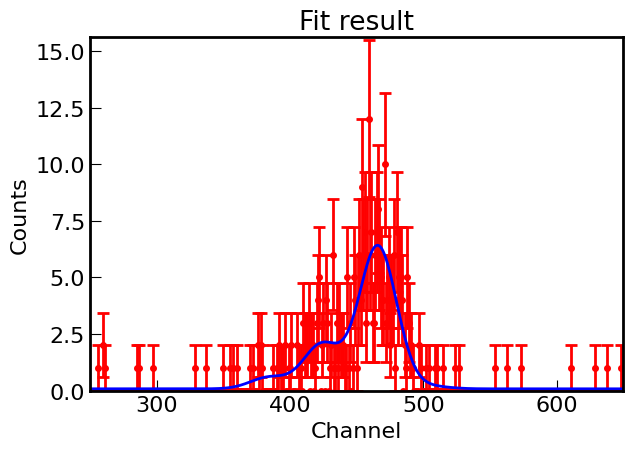

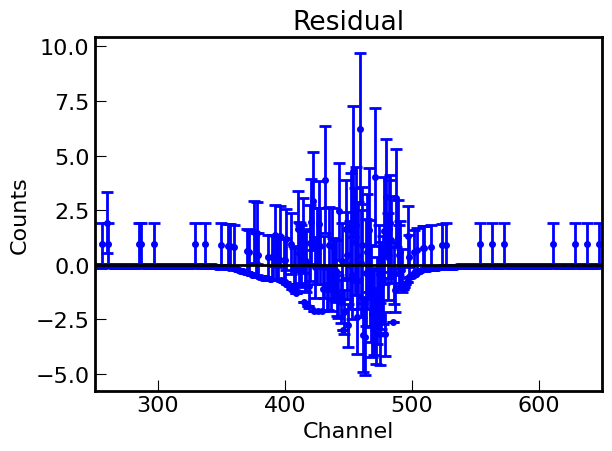

In [44]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

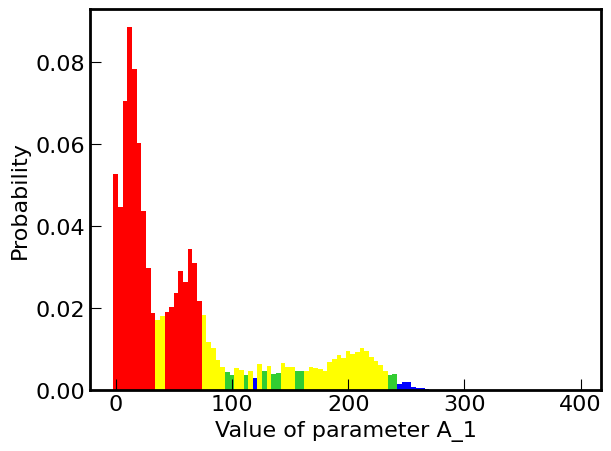

In [45]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1104: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1105: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1106: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1107: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

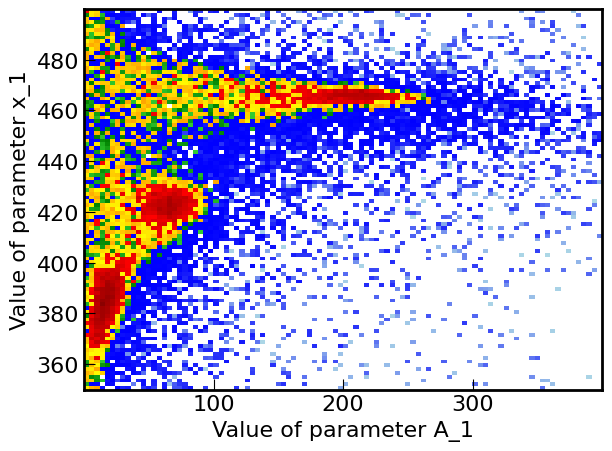

In [46]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

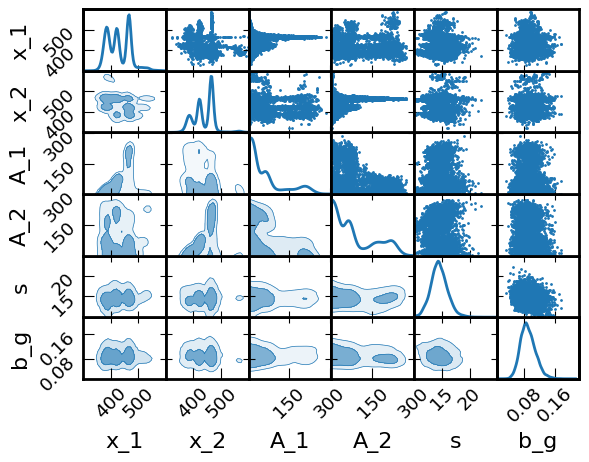

In [47]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])